In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler




import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense


In [7]:
df = pd.read_csv('/content/waterQuality1.csv')  
df 

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [9]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [10]:
df.describe() 

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [11]:
#sns.pairplot(df) 

In [12]:
#df.corr()

In [13]:
#df.boxplot() 

In [14]:
#df.columns

In [15]:
#df[['aluminium']].boxplot() 

In [16]:
x = df.drop('is_safe',axis=1)
std_scaler = StandardScaler() 
x_df = pd.DataFrame(std_scaler.fit_transform(x),columns=x.columns) 
x_df 

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,0.777403,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,-0.363345,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040
1,1.306945,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.002460,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023
2,0.271572,-0.029083,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728
3,0.548198,-0.332067,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,1.184567,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023
4,0.200439,1.132165,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,-0.575804,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,-0.487175,-0.731915,-0.639217,0.314165,-0.077771,-0.809330,-0.802892,-1.187263,1.374275,-0.970370,-0.869387,1.677459,0.806757,-0.575412,-0.064914,-0.729052,-0.340173,1.401260,-0.611672,-0.545353
7992,-0.487175,1.119776,-0.560046,-0.804117,-0.910016,-0.672986,-0.839840,-1.202564,1.626919,-0.970370,-0.869387,-1.176498,0.081339,-0.575412,-1.413097,-0.847213,-0.779325,1.401260,-0.333042,1.313085
7993,-0.455561,-0.836663,-0.639217,-0.787672,-0.355186,-0.828807,-0.728995,-1.202564,0.317766,-0.970370,-0.869387,1.419571,1.100895,-0.575412,-1.750143,-0.854563,0.826593,-1.726831,-0.750986,0.198023
7994,-0.518790,-0.481869,-0.599632,0.355278,-1.187431,-0.069180,-0.913738,-1.095458,-1.772284,-0.970370,-0.869387,-1.709466,-1.771906,-2.319897,-1.750143,-0.930887,-1.257225,-1.726831,-1.029616,-1.660415


In [17]:
model = Sequential()
model.add(Dense(20,activation="relu",input_dim=20))
#model.add(Dropout(0.2))
model.add(Dense(15,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 9)                 144       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"])

In [20]:
y = df['is_safe']
x_train,x_test,y_train,y_test = train_test_split(x_df,y,test_size=0.2,random_state=40) 
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape) 

(6396, 20)
(1600, 20)
(6396,)
(1600,)


In [21]:
history = model.fit(
x_train,
y_train,
verbose=True,
batch_size=32,
validation_split=0.1,
epochs=100)


Epoch 1/100
180/180 [==============================] - 3s 4ms/step - loss: 0.3396 - accuracy: 0.8820 - val_loss: 0.2764 - val_accuracy: 0.8875
Epoch 2/100
180/180 [==============================] - 1s 3ms/step - loss: 0.2653 - accuracy: 0.8853 - val_loss: 0.2407 - val_accuracy: 0.8859
Epoch 3/100
180/180 [==============================] - 1s 3ms/step - loss: 0.2343 - accuracy: 0.9010 - val_loss: 0.2180 - val_accuracy: 0.9156
Epoch 4/100
180/180 [==============================] - 1s 3ms/step - loss: 0.2106 - accuracy: 0.9211 - val_loss: 0.1998 - val_accuracy: 0.9266
Epoch 5/100
180/180 [==============================] - 1s 3ms/step - loss: 0.1879 - accuracy: 0.9303 - val_loss: 0.1843 - val_accuracy: 0.9312
Epoch 6/100
180/180 [==============================] - 1s 3ms/step - loss: 0.1693 - accuracy: 0.9376 - val_loss: 0.1714 - val_accuracy: 0.9375
Epoch 7/100
180/180 [==============================] - 1s 3ms/step - loss: 0.1535 - accuracy: 0.9411 - val_loss: 0.1535 - val_accuracy: 0.9422

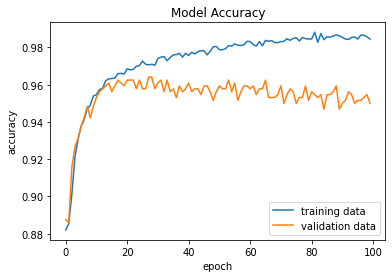

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training data","validation data"],loc="lower right")


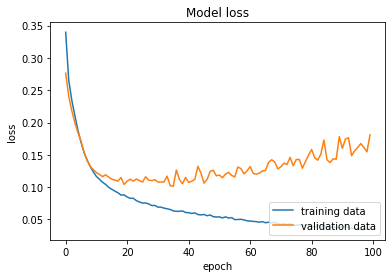

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training data","validation data"],loc="lower right")

In [24]:
y_log = model.predict(x_test)
y_log[:1]




50/50 [==============================] - 0s 1ms/step


array([[3.238704e-14]], dtype=float32)

In [25]:
y_pred = np.where(y_log>0.5,1,0)
y_pred[:1]

array([[0]])

In [26]:
y_pred[:1] 

array([[0]])

Accuracy score :  0.949375


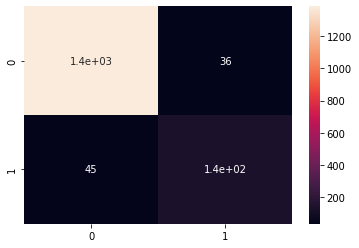

In [27]:
# Accuracy score
acc = accuracy_score(y_test,y_pred)
print("Accuracy score : ",acc)

# plotting the confusion matrix
cnf = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf,annot= True)


In [28]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1420
           1       0.79      0.75      0.77       180

    accuracy                           0.95      1600
   macro avg       0.88      0.86      0.87      1600
weighted avg       0.95      0.95      0.95      1600



In [29]:
import pickle
filename = "trained_model.sav"
pickle.dump(model,open(filename,"wb"))
filename_sc = "scaler.pkl"
pickle.dump(std_scaler,open(filename_sc,"wb"))



In [30]:
x_train.columns.tolist()

['aluminium',
 'ammonia',
 'arsenic',
 'barium',
 'cadmium',
 'chloramine',
 'chromium',
 'copper',
 'flouride',
 'bacteria',
 'viruses',
 'lead',
 'nitrates',
 'nitrites',
 'mercury',
 'perchlorate',
 'radium',
 'selenium',
 'silver',
 'uranium']

In [31]:
!pip install keras 
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=30638b376ad93a279962689e3e8a3e71f31e0ed2b52bb11739677348b1f8c2fb
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from ann_visualizer.visualize import ann_viz

ann_viz(model)

In [33]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 72.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [34]:


%%writefile app.py
import numpy as np
import pickle
import streamlit as st

# loading the saved model
loaded_model = pickle.load(open("/content/trained_model.sav","rb"))

#loadiing the scaler object
loaded_scaler = pickle.load(open("/content/scaler.pkl","rb"))

def water_prediction(input_data):
    input_data = np.asarray(input_data)
    # we need to reshape the array as we are passing for single instance
    input_data_reshape = input_data.reshape(1,-1)
    x_test_scaling = loaded_scaler.transform(input_data_reshape)
    prediction = loaded_model.predict(x_test_scaling)
    y_pred = np.where(prediction>0.5,1,0)

    
    if (y_pred[0][0]==0):
        print("The water quality is not safe for drinking")
    else:
        print("The water quality is safe for drinking")
def main():
    # giving the title to the web page
    st.title("To find the water is safe for drinking or not")
    # getting the input from the web page
    aluminium = st.text_input("content of aluminium")
    ammonia = st.text_input("content of ammonia")
    arsenic = st.text_input("content of arsenic")
    barium = st.text_input("content of barium")
    cadmium = st.text_input("content of cadmium")
    chloramine = st.text_input("content of chloramine")
    chromium = st.text_input("content of chromium")
    copper = st.text_input("content of copper")
    flouride = st.text_input("content of flouride")
    bacteria = st.text_input("content of bacteria")
    viruses = st.text_input("content of viruses")
    lead = st.text_input("content of lead")
    nitrates = st.text_input("content of nitrates")
    nitrites = st.text_input("content of nitrites")
    mercury = st.text_input("content of mercury")
    perchlorate = st.text_input("content of perchlorate")
    radium = st.text_input("content of radium")
    selenium = st.text_input("content of selenium")
    silver = st.text_input("content of silver")
    uranium = st.text_input("content of uranium")

    # code for the prediction
    Quality = ""
    
    # creating the button for prediction
    if st.button("Water Test Result"):
        Quality = water_prediction([aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium])
    st.success(Quality)
if __name__=='__main__':
    main()


Writing app.py


In [35]:
pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=9dfa4d1731275de89b69c069b8465099a9c0e3e6b4bd277cf39afba8c54d74ba
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [36]:
pip install protobuf==3.20.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [37]:
#docker run -it python:3.10 /bin/bash
# Within the Docker container:
!pip3 install google-cloud-logging==3.1.1 protobuf==4.21.0
!python3 -c "import google.cloud.logging"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.6/407.6 KB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 KB 17.8 MB/s eta 0:00:00
Reason for being yanked: Required python version not configured correctly (https://github.com/protocolbuffers/protobuf/issues/10076)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.0
    Uninstalling google-api-core-2.11.0:
      Successfully uninstalled google-api-core-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages tha

In [38]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [39]:
pip install --upgrade "protobuf<=3.20.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.0
    Uninstalling protobuf-4.21.0:
      Successfully uninstalled protobuf-4.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
grpc-google-iam-v1 0.12.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.58.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,

In [40]:
!pip install 'protobuf<=3.20.1' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
grpc-google-iam-v1 0.12.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.58.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] / fetchMetadata: sill resolveWithNewModule emoji-regex@8.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.142.252:8501

npx: installed 22 in 3.378s
your url is: https://metal-birds-visit-34-91-142-252.loca.lt
2023-01-28 16:13:22.869900: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
1/1 [==============================] - 1s 563ms/step
The water quality is not safe for drinking
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
1/1 [======================